<a href="https://colab.research.google.com/github/basagliuz/Tirocinio/blob/main/Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First question
Load the data into memory. What are the sampling rate and duration of the data?

First I load data into Colab.

In [2]:
# Run once, then click "restart session" in the runtime menu and run again

! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc

# Download data
! wget https://dcc.ligo.org/public/0187/G2300818/001/challenge1.gwf

# For gwpy
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel = "H1:CHALLENGE1")

# For pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

--2024-08-31 14:22:19--  https://dcc.ligo.org/public/0187/G2300818/001/challenge1.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025680 (3.8M)
Saving to: ‘challenge1.gwf.2’

challenge1.gwf.2    100%[===================>]   3.84M  7.08MB/s    in 0.5s    

2024-08-31 14:22:21 (7.08 MB/s) - ‘challenge1.gwf.2’ saved [4025680/4025680]



Here I find the sampling rate and the duration of the data.

In [14]:
# How far apart are the point of the time series?
dt = gwpy_strain.dt

# Now I can find sampling rate and duration
sampling_rate = 1/dt
duration = len(pycbc_strain) * dt
print('The sampling rate of the data is {}; the duration [of the data] is {}.'.format(sampling_rate, duration))

The sampling rate of the data is 4096.0 1 / s; the duration [of the data] is 128.0 s.


# Second question
Plot the data in time domain.

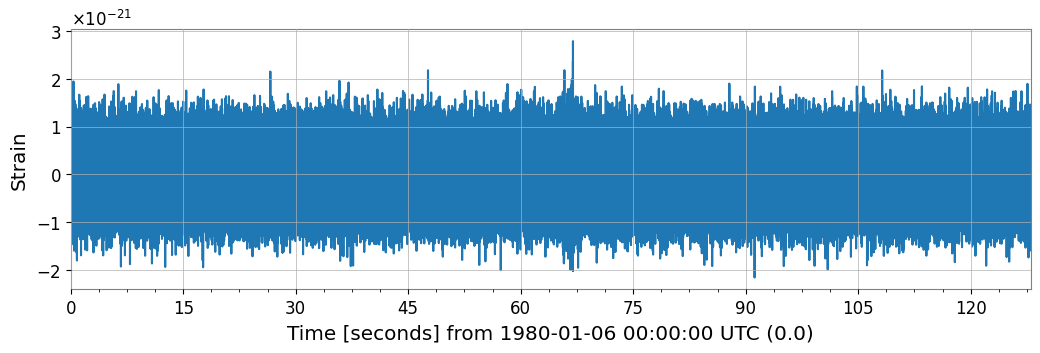

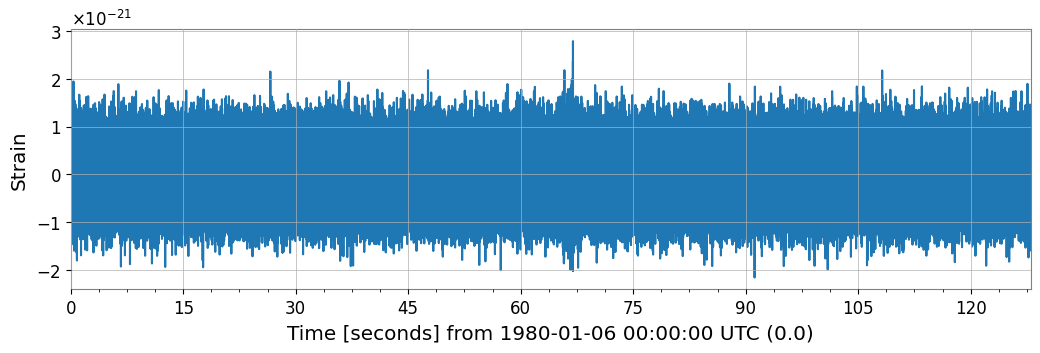

In [16]:
# Just a simple plot
gwpy_strain.plot(ylabel = 'Strain')

# Third question
Plot a spectrogram (or q-transform) of the data, and try to identify the signal.

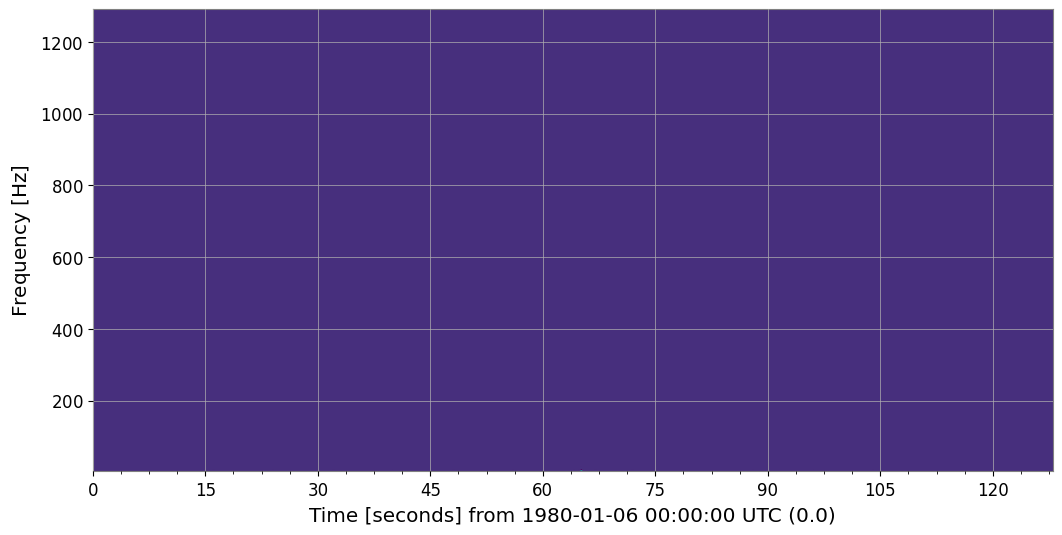

In [38]:
# This time 'Just a simple spectrogram' won't work
spectrogram = gwpy_strain.q_transform().plot()

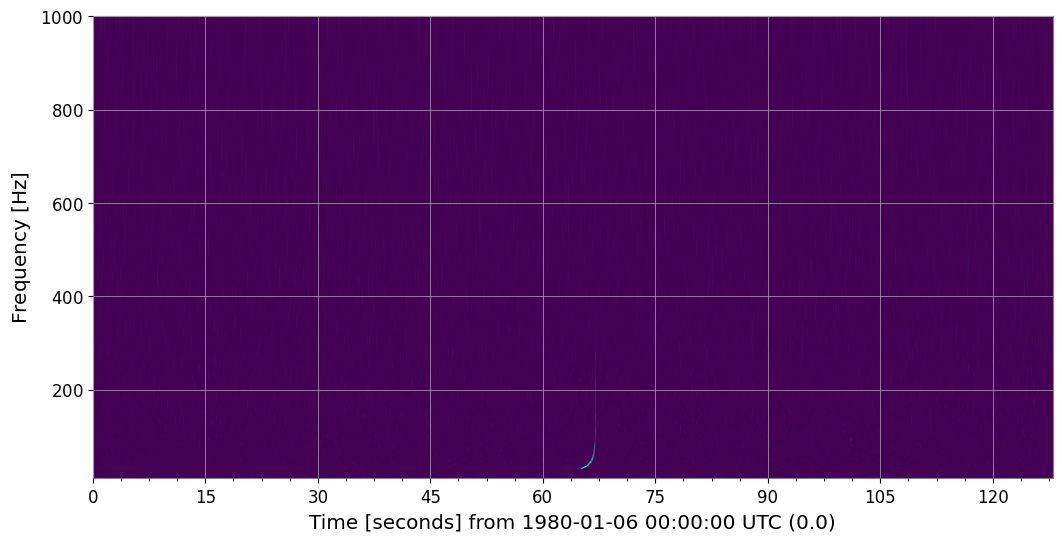

In [53]:
# Let's try to focus a bit into the sensitivity bucket
spectrogram = gwpy_strain.q_transform(frange = (10, 1000)).plot()

We can identify some kind of signal between 60 s and 75 s.

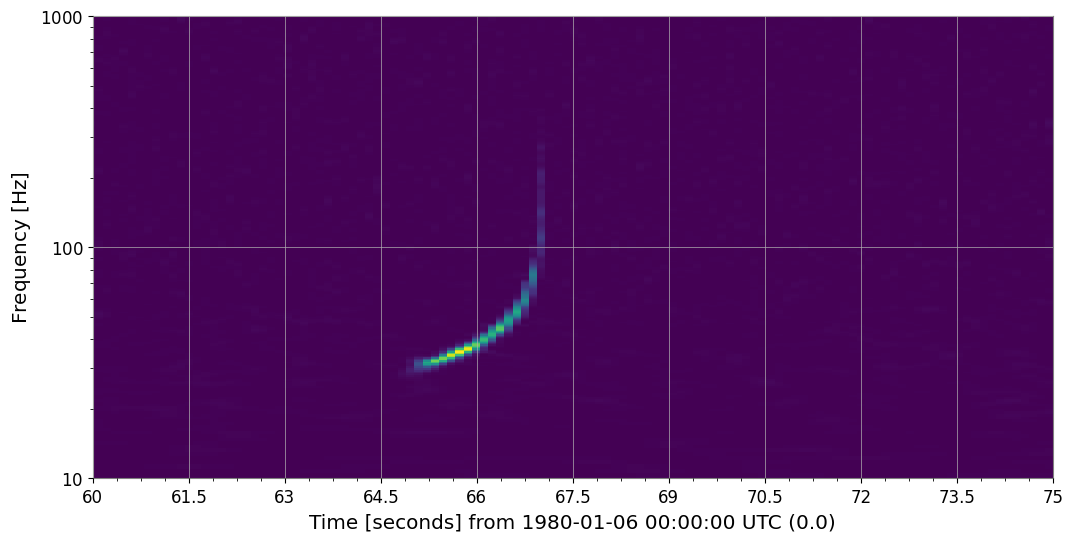

In [52]:
spectrogram = gwpy_strain.q_transform(frange = (10, 1000)).plot(xlim = (60, 75),
                                                                yscale = ('log'),
                                                                epoch = 0)